# Algoritma Decision Tree Untuk Memprediksi Risiko Kematian Pasien Gagal Jantung

## Pendahuluan


Penyakit kardiovaskular masih menjadi ancaman dunia dan merupakan penyakit yang berperan besar sebagai penyebab kematian nomor satu di dunia. Data Organisasi Kesehata Dunia (WHO) menyebutkan, lebih dari 17 juta orang di dunia meninggal akibat penyakit kardiovaskular. Kegagalan sistem kardiovaskular atau dikenal dengan gagal jantung adalah kondisi medis di mana jantung tidak dapat memompa cukup darah ke seluruh tubuh sehingga oksigen dan nutrisi tidak memenuhi kebutuhan jaringan tubuh.   Pada penelitian ini memprediksi risiko kematian pasien gagal jantung menggunakan metode klasifikasi dengan algoritma decision tree. Dataset heart failure berisi 12 variabel yang dapat digunakan untuk memprediksi Harapan hidup akibat gagal jantung.

### Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

### Mengakses Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dityaanggraheni/Decision-Tree/main/heart_failure_clinical_records_dataset.csv')
df.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Tujuan analisis data

Melakukan klasifikasi untuk memprediksi risiko kematian pasien gagal jantung menggunakan dataset Heart Failure dengan algoritma decision tree

### Memahami dataset

Dataset Heart Failure dibuat untuk membuat machine learning untuk melakukan klasifikasi biner(Meninggal atau Tidak Meninggal). Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:
1. **age** = Umur pasien 
2. **anaemia** = Penurunan sel darah merah atau hemoglobin(0=Tidak, 1=Ya)
3. **creatinine_phosphokinase** = Tingkat enzim creatinine phosphokinase dalam darah
4. **diabetes** = Menderita diabetes(0=Tidak, 1=Ya)
5. **ejection_fraction** = Persentase darah yang meninggalkan jantung pada setiap kontraksi
6. **high_blood_pressure** = Menderita hipertensi(0=Tidak, 1=Ya)
7. **platelets** = Trombosit dalam darah
8. **serum_creatinine** = Tingkat kreatinin dalam darah
9. **serum_sodium** =Tingkat natrium dalam darah
10. **sex** = Jenis kelamin(Female/male)
11. **smoking** = perokok(0=Tidak, 1=Ya)
12. **time** = Periode tindak lanjut
13. **DEATH_EVENT** =  Jika pasien meninggal selama masa tindak lanjut(0=Tidak, 1=Ya)

## Exploratory Data Analysis - EDA

### Dimensi Data

In [3]:
df.shape

(299, 13)

Dataset Heart Failure memiliki data dengan 13 kolom dan 299 baris

### Variabel Pada Dataset

In [4]:
df.columns.values 

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Menampilkan variabel-variabel dalam dataset beserta tipe data masing-masing variabel

### Mengecek Missing Data

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada field yang kosong atau tidak ada data yang hilang

### Mengecek Duplikat Data

In [8]:
df.duplicated().sum()

0

tidak ada data yang sama

### Mengecek Outliner

<function matplotlib.pyplot.tight_layout>

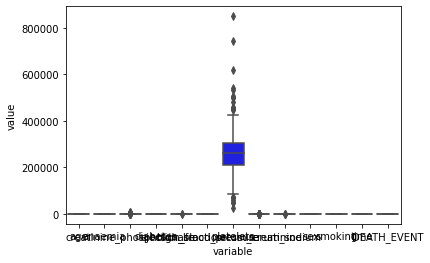

In [9]:
sns.boxplot(x="variable", y="value", color='blue', data=pd.melt(df))
plt.tight_layout

Kolom numeric yang memiliki outlier adalah creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, dan serum_sodium

### Melihat Korelasi Data

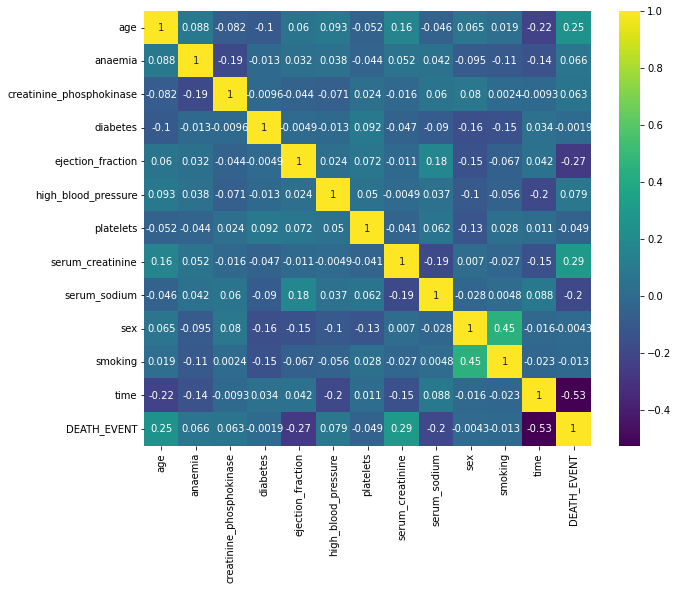

In [10]:
k = len(df.columns)
cm = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Melihat hubungan antara nilai kategorikal dan DEATH_EVENT, menggunakan boxplot dari seaborn

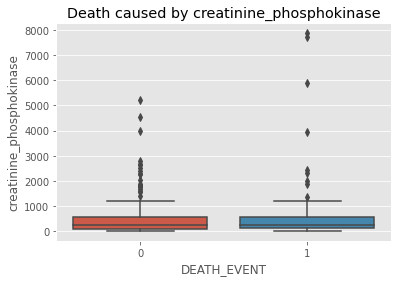

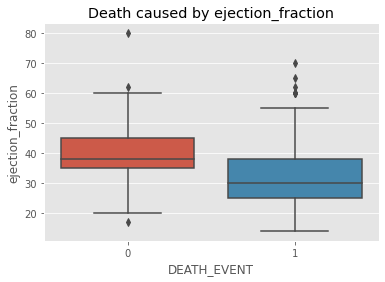

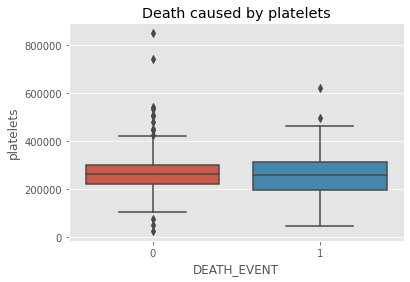

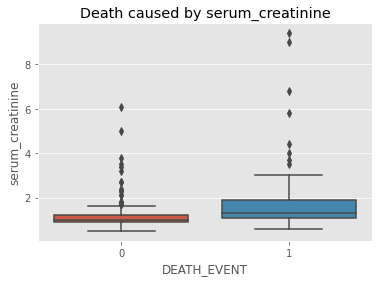

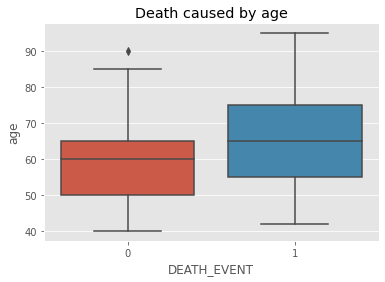

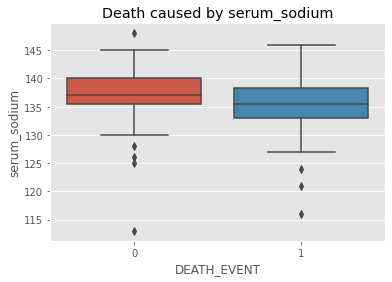

In [11]:
plt.style.use('ggplot')
Y = df[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
        'serum_creatinine','age', 'serum_sodium']]
for col in Y:
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)
    plt.title( 'Death caused by ' + col)
    plt.show()

dari boxplot di atas serum sodium, age, platelets, serum creatinine and ejection fraction adalah pengklasifikasi yang baik dari DEATH_EVENT

### Melihat Statistik Data

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Preprocessing

In [13]:
from sklearn.tree import DecisionTreeClassifier

### Memilih Variabel Target dan Variabel Independen

In [14]:
x = df.drop('DEATH_EVENT', axis=1)
X = x.values
y = df['DEATH_EVENT'].values

### Membagi data menjadi data uji dan data latih

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train Size: \n', x_train.shape)
print('Test Size: \n', x_test.shape)

Train Size: 
 (239, 12)
Test Size: 
 (60, 12)


### Performa measure
yaitu diperoleh hasil accuracy, recall, precision, F1-Score dengan kedalaman (depth) 4 s.d. 9

In [17]:
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score

In [18]:
for i in range(4, 10):
    death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    death_tree.fit(x_train, y_train)
    pred_death = death_tree.predict(x_test)
    print('dengan max_depth: {}, Akurasi: {}'.format (i, metrics.accuracy_score(y_test, pred_death)))
    print('dengan max_depth: {}, Recall: {}'.format(i,recall_score(y_test, pred_death)))
    print('dengan max_depth: {}, Precision: {}'.format(i,precision_score(y_test, pred_death)))
    print('dengan max_depth: {}, F1-Score: {}'.format(i,f1_score(y_test, pred_death)))
    print('\n')

dengan max_depth: 4, Akurasi: 0.85
dengan max_depth: 4, Recall: 0.8571428571428571
dengan max_depth: 4, Precision: 0.631578947368421
dengan max_depth: 4, F1-Score: 0.7272727272727273


dengan max_depth: 5, Akurasi: 0.85
dengan max_depth: 5, Recall: 0.7857142857142857
dengan max_depth: 5, Precision: 0.6470588235294118
dengan max_depth: 5, F1-Score: 0.7096774193548386


dengan max_depth: 6, Akurasi: 0.9333333333333333
dengan max_depth: 6, Recall: 0.7857142857142857
dengan max_depth: 6, Precision: 0.9166666666666666
dengan max_depth: 6, F1-Score: 0.8461538461538461


dengan max_depth: 7, Akurasi: 0.8833333333333333
dengan max_depth: 7, Recall: 0.7857142857142857
dengan max_depth: 7, Precision: 0.7333333333333333
dengan max_depth: 7, F1-Score: 0.7586206896551724


dengan max_depth: 8, Akurasi: 0.8833333333333333
dengan max_depth: 8, Recall: 0.7857142857142857
dengan max_depth: 8, Precision: 0.7333333333333333
dengan max_depth: 8, F1-Score: 0.7586206896551724


dengan max_depth: 9, Akurasi:

output di atas menunjukkan akurasi terbaik dari model dengan depth yang berbeda dan model memberikan akurasi maksimum 0,93 yaitu dengan depth 6.

In [19]:
death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
death_tree.fit(x_train, y_train)
pred_death = death_tree.predict(x_test)
print('dengan max_depth: {}, Akurasi: {}'.format (6, metrics.accuracy_score(y_test, pred_death)))
print('dengan max_depth: {}, Recall: {}'.format(6,recall_score(y_test, pred_death)))
print('dengan max_depth: {}, Precision: {}'.format(6,precision_score(y_test, pred_death)))
print('dengan max_depth: {}, F1-Score: {}'.format(6,f1_score(y_test, pred_death)))

dengan max_depth: 6, Akurasi: 0.9333333333333333
dengan max_depth: 6, Recall: 0.7857142857142857
dengan max_depth: 6, Precision: 0.9166666666666666
dengan max_depth: 6, F1-Score: 0.8461538461538461


### Confusion matrix decision tree

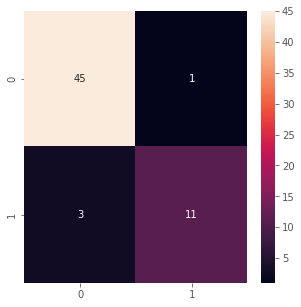

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
metrics.confusion_matrix(y_test, pred_death)
plt.figure(figsize = (5,5))
sns.heatmap(metrics.confusion_matrix(y_test, pred_death), annot = True)

Anggap yang meninggal label positif sedangkan yang tidak meninggal label negatif

1.   **True Negatif (TN)**: model memprediksi seorang pasien gagal jantung tidak meninggal dan memang kenyataan pasien tersebut tidak meninggal
2.   **True Positif (TP)**: model memprediksi seorang pasien gagal jantung meninggal dan memang kenyataan pasien tersebut meninggal
3.   **False Negatif (FN)**: model memprediksi seorang pasien gagal jantung tidak meninggal dan kenyataannya pasien tersebut meninggal
4.   **False Positif (FP)**: model memprediksi seorang pasien gagal jantung meninggal dan kenyataannya pasien tersebut tidak meninggal

Dari plot diatas diperoleh bahwa `TN = 45, FP = 1, FN = 3, dan TP = 11`

### Visualisasi Decision Tree

In [21]:
from sklearn import tree
import graphviz

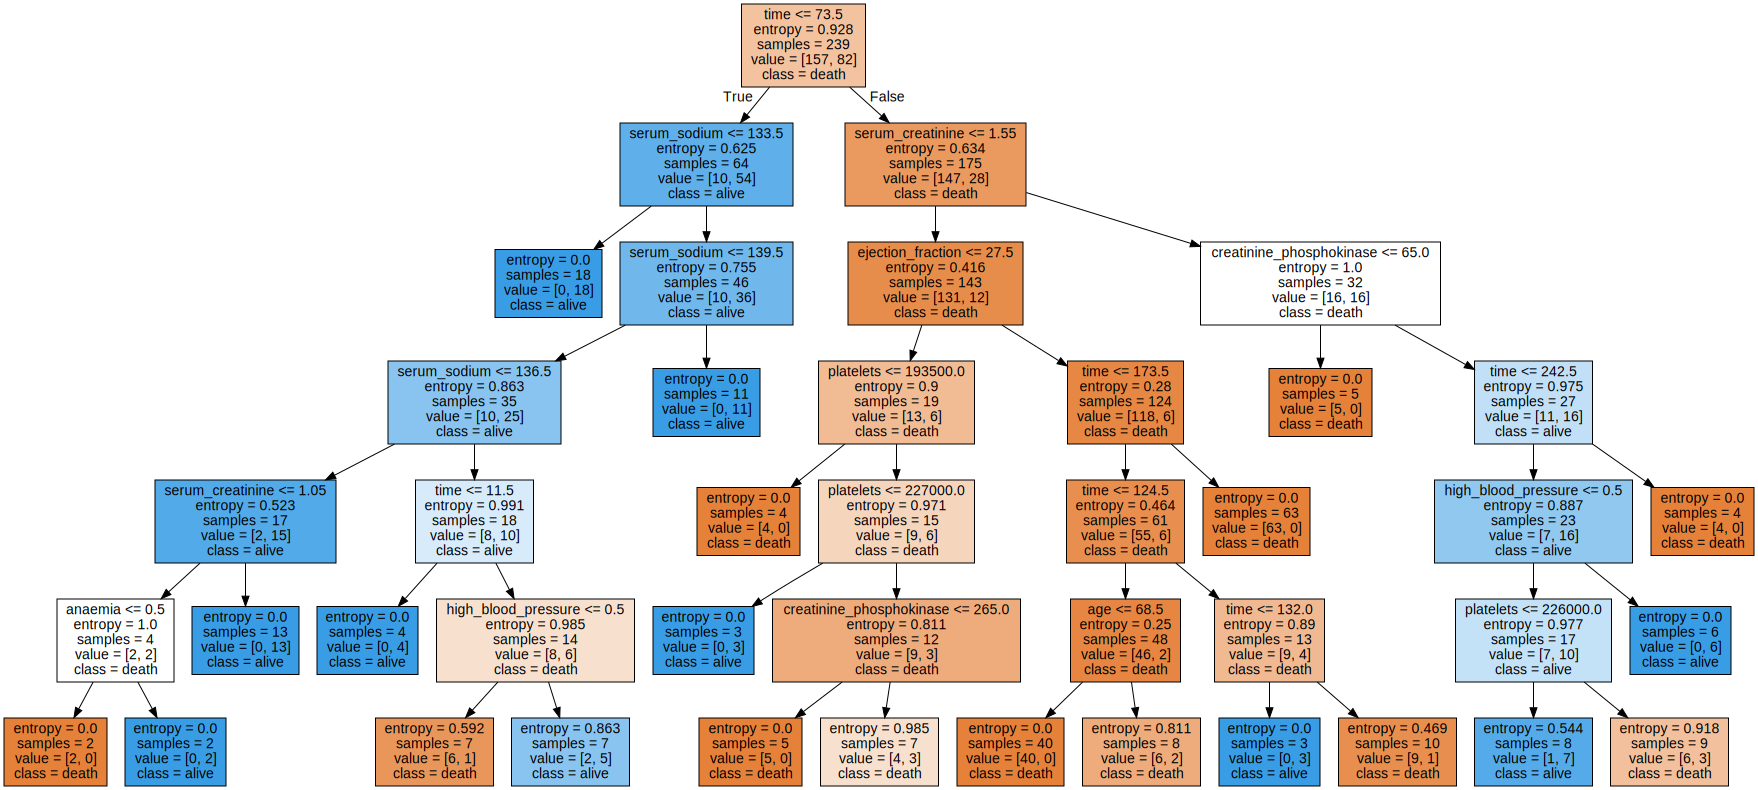

<Figure size 14400x14400 with 0 Axes>

In [22]:
plt.figure(figsize=(200, 200))
filename ='death_tree.png'

featureNames = df.columns[:-1]
targetNames = ['death', 'alive']

dot_data = tree.export_graphviz(death_tree, feature_names=featureNames, class_names=targetNames,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph